Dataset link: https://www.kaggle.com/datasets/anthonypino/melbourne-housing-market

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.rcParams["figure.figsize"] = (10,6)
import numpy as np

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Facultate/year1-sem2/big-data/data/melbourne-housing-market.csv', parse_dates=['Date'])
df.head(2)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,2016-03-09,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         34857 non-null  object        
 1   Address        34857 non-null  object        
 2   Rooms          34857 non-null  int64         
 3   Type           34857 non-null  object        
 4   Price          27247 non-null  float64       
 5   Method         34857 non-null  object        
 6   SellerG        34857 non-null  object        
 7   Date           34857 non-null  datetime64[ns]
 8   Distance       34856 non-null  float64       
 9   Postcode       34856 non-null  float64       
 10  Bedroom2       26640 non-null  float64       
 11  Bathroom       26631 non-null  float64       
 12  Car            26129 non-null  float64       
 13  Landsize       23047 non-null  float64       
 14  BuildingArea   13742 non-null  float64       
 15  YearBuilt      1555

In [4]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [5]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [6]:
# removing entries with no price
df = df[df['Price'].notna()]
print(f'Cleaned dataframe size: {len(df)}')

Cleaned dataframe size: 27247


In [7]:
# nulls after dropping entries with no price
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          6441
Bathroom          6447
Car               6824
Landsize          9265
BuildingArea     16591
YearBuilt        15163
CouncilArea          3
Lattitude         6254
Longtitude        6254
Regionname           3
Propertycount        3
dtype: int64

In [8]:
def check_float_column(df, column_name, xlabel, nan_replacement=-1, compact_labels=False):
  nanCount = sum(df[column_name].isnull())
  if nanCount > 0:
    print(f"Column has {nanCount} NaN values! Replacing them with {nan_replacement}")
    column = list(df[column_name].fillna(nan_replacement))
    df[column_name].fillna(nan_replacement, inplace=True)
  else:
    column = list(df[column_name])
  column_sorted = sorted(column)
  x = [i for i in range(1, len(column) + 1)]
  if compact_labels == True:
    plt.gca().yaxis.set_major_locator(plt.MaxNLocator(10))
  plt.plot(x, column_sorted)
  plt.xlabel("Houses")
  plt.ylabel(column_name)
  plt.show()

  if compact_labels == True:
    plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))
  plt.hist(column_sorted, bins=30)
  plt.title(column_name)
  plt.xlabel(xlabel)
  plt.ylabel("House count")
  plt.show()

  print(df[column_name].describe())

  zero_value = sum(df[column_name] == 0)

  print()
  print(f"There are {zero_value} properties with a value of 0 for {column_name}")

In [9]:
def check_text_column(df, column_name, title="", xlabel="", ylabel="", nan_replacement="", plot_first_ten=False, rotate_labels=False):
  # filling nans
  df[column_name].fillna(nan_replacement, inplace=True)
  # get a dictionary
  uniqueMap = {}
  for elem in df[column_name]:
    if elem not in uniqueMap:
      uniqueMap[elem] = 1
    else:
      uniqueMap[elem] += 1
  print(f'Found {len(uniqueMap)} values for column {column_name}')

  # sort descending
  uniqueList = [(key, value) for key, value in uniqueMap.items()]
  uniqueList.sort(key=lambda x: -x[1])

  # plot and check for too many
  if plot_first_ten:
    uniqueList = uniqueList[:10]
  strings = [x[0] for x in uniqueList]
  frequencies = [x[1] for x in uniqueList]
  
  fig = plt.figure()
  ax = fig.add_axes([0,0,1,1])
  if rotate_labels:
    plt.xticks(rotation=45)
  ax.bar(strings, frequencies)
  if title != "":
    ax.set_title("")
  if xlabel != "":
    ax.set_xlabel(xlabel)
  if ylabel != "":
    ax.set_ylabel(ylabel)
  plt.show()

List of text features (we can pick some that seem usefull, embed them with BOW/TF-IDF and merge them all into one column):
* Suburb - seems important
* Address - seems important
* Type - enum value check kaggle
* Method - enum value check kaggle
* Seller - real este agent name, could be important?
* CouncilArea - governing council for the area - probably not important
* Regionname - general Region (West, North West, North, North east, etc)

List of numeric features:
* Rooms - # of rooms - important
* Price - target feature
* Date - date sold - could also be important if AUS house market fluctuated in the time data was scraped
* Distance - distance to Sydney central business district in KM - not important since we have postcode
* Postcode - maybe pick between this and distance - important
* Bedroom2 - beedrom count scraped from other sources - perhaps inaccurate
* Bathroom - bathroom count
* Car - number of parking spots
* Landsize - land size in meters - defo important
* BuildingArea - building size in meters - defo important
* YearBuilt - defo important
* Latitude/Longitude - too unique to pick over zipcode imo
* PropertyCount - # of properties that exist in suburb, could be tied to overall polution, overpopulation etc => good correlation with price

# Checking float columns

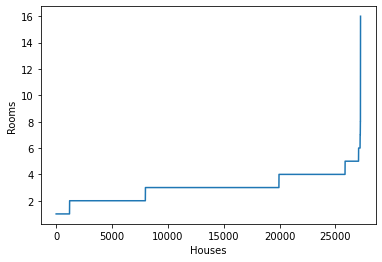

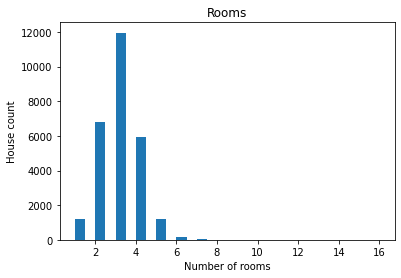

count    27247.000000
mean         2.992293
std          0.954795
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         16.000000
Name: Rooms, dtype: float64

There are 0 properties with a value of 0 for Rooms


In [10]:
check_float_column(df, "Rooms", "Number of rooms")
# most houses seem to value at around 1M-2M AUD

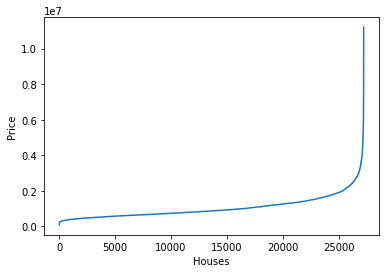

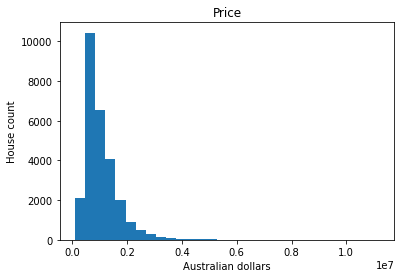

count    2.724700e+04
mean     1.050173e+06
std      6.414671e+05
min      8.500000e+04
25%      6.350000e+05
50%      8.700000e+05
75%      1.295000e+06
max      1.120000e+07
Name: Price, dtype: float64

There are 0 properties with a value of 0 for Price


In [11]:
check_float_column(df, "Price", "Australian dollars")
# most have 3 rooms, almost uniform distribution
# this is the target for regression

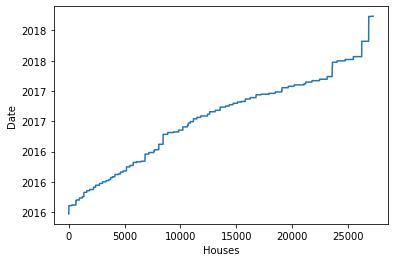

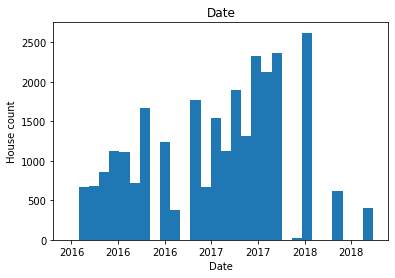

count                   27247
unique                     78
top       2017-10-28 00:00:00
freq                      879
first     2016-01-28 00:00:00
last      2018-10-03 00:00:00
Name: Date, dtype: object

There are 0 properties with a value of 0 for Date


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.


In [12]:
check_float_column(df, "Date", "Date", compact_labels=True)

Column has 1 NaN values! Replacing them with 11.280276003817528


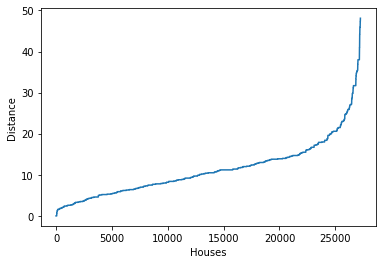

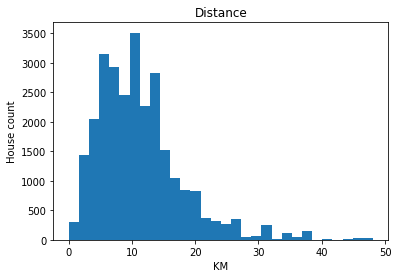

count    27247.000000
mean        11.280276
std          6.787344
min          0.000000
25%          6.400000
50%         10.500000
75%         14.000000
max         48.100000
Name: Distance, dtype: float64

There are 58 properties with a value of 0 for Distance


In [13]:
avg_distance = df['Distance'].mean()
check_float_column(df, "Distance", "KM", nan_replacement=avg_distance)

Column has 1 NaN values! Replacing them with 3073.0


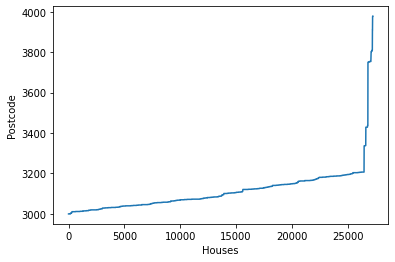

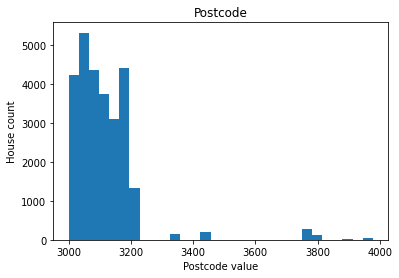

count    27247.000000
mean      3113.794583
std        111.137911
min       3000.000000
25%       3046.000000
50%       3088.000000
75%       3153.000000
max       3978.000000
Name: Postcode, dtype: float64

There are 0 properties with a value of 0 for Postcode


In [14]:
most_common_postcode = df['Postcode'].mode()[0]
check_float_column(df, "Postcode", "Postcode value", nan_replacement=most_common_postcode)

Column has 6441 NaN values! Replacing them with 3.0


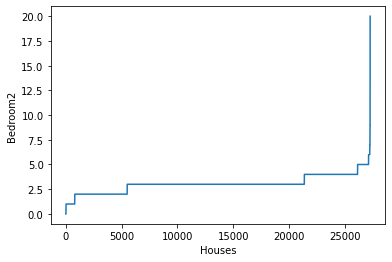

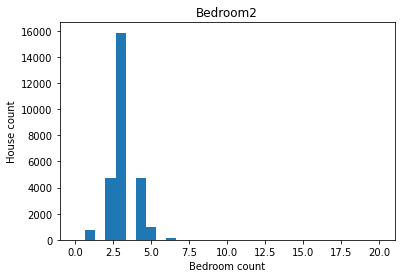

count    27247.000000
mean         3.035307
std          0.834856
min          0.000000
25%          3.000000
50%          3.000000
75%          3.000000
max         20.000000
Name: Bedroom2, dtype: float64

There are 16 properties with a value of 0 for Bedroom2


In [15]:
# we can replace this value with most common number of bedrooms
most_common_no_of_bedrooms = df['Bedroom2'].mode()[0]
check_float_column(df, "Bedroom2", "Bedroom count", nan_replacement=most_common_no_of_bedrooms)

Column has 6447 NaN values! Replacing them with 1.0


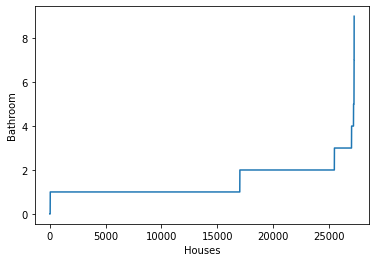

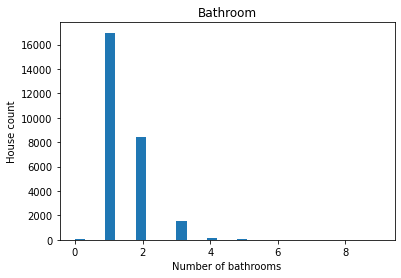

count    27247.000000
mean         1.451683
std          0.661993
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          9.000000
Name: Bathroom, dtype: float64

There are 34 properties with a value of 0 for Bathroom


In [16]:
most_common_no_of_bathrooms = df['Bathroom'].mode()[0]
check_float_column(df, "Bathroom", "Number of bathrooms", nan_replacement=most_common_no_of_bathrooms)

Column has 6824 NaN values! Replacing them with 2.0


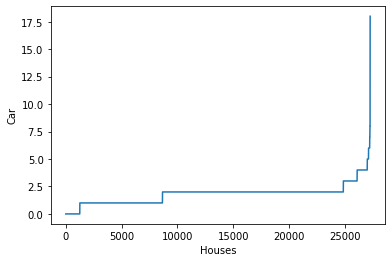

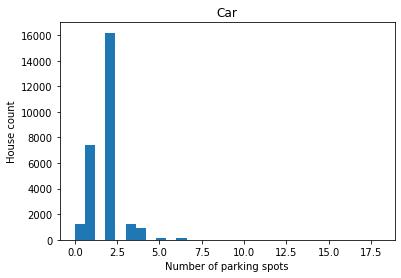

count    27247.000000
mean         1.786655
std          0.869543
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         18.000000
Name: Car, dtype: float64

There are 1251 properties with a value of 0 for Car


In [17]:
most_common_no_of_pspots = df['Car'].mode()[0]
check_float_column(df, "Car", "Number of parking spots", nan_replacement=most_common_no_of_pspots)

In [18]:
# there seem to be a few properties with misleading landsize eg. 433014.000000
old_size = len(df)
df = df.drop(df[df["Landsize"] > 5000].index)
print(f'Dropped {old_size - len(df)} entries due to bad landsize data')

Dropped 82 entries due to bad landsize data


Column has 9265 NaN values! Replacing them with 490.85569832402234


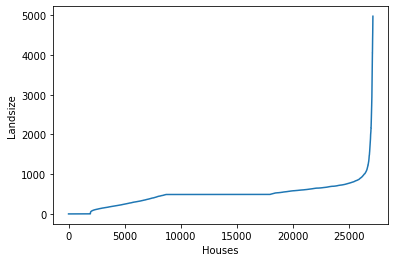

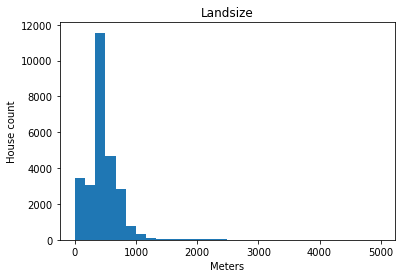

count    27165.000000
mean       490.855698
std        341.685808
min          0.000000
25%        350.000000
50%        490.855698
75%        590.000000
max       4977.000000
Name: Landsize, dtype: float64

There are 1942 properties with a value of 0 for Landsize


In [19]:
avg_landsize = df['Landsize'].mean()
check_float_column(df, "Landsize", "Meters", nan_replacement=avg_landsize)

Column has 16552 NaN values! Replacing them with 152.82693900876285


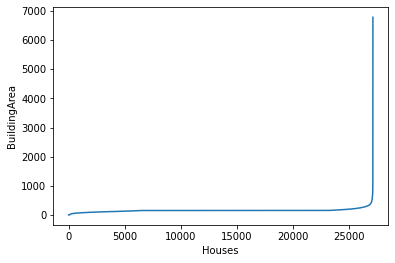

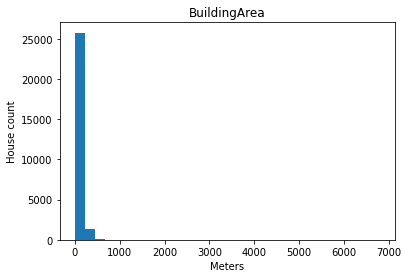

count    27165.000000
mean       152.826939
std         81.870599
min          0.000000
25%        152.826939
50%        152.826939
75%        152.826939
max       6791.000000
Name: BuildingArea, dtype: float64

There are 60 properties with a value of 0 for BuildingArea


In [20]:
# too many missing values should drop
avg_b_area = df['BuildingArea'].mean()
check_float_column(df, "BuildingArea", "Meters", nan_replacement=avg_b_area)

Column has 15130 NaN values! Replacing them with 1966.5163273784794


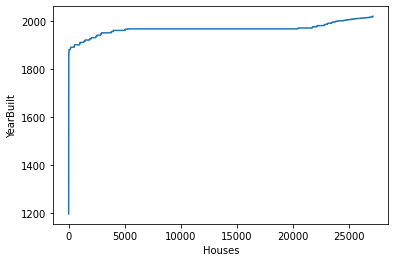

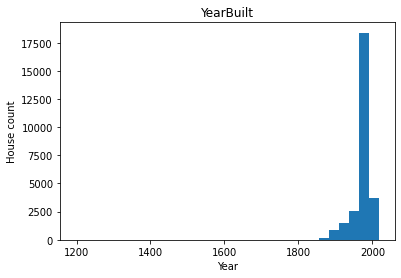

count    27165.000000
mean      1966.516327
std         24.460473
min       1196.000000
25%       1966.516327
50%       1966.516327
75%       1966.516327
max       2019.000000
Name: YearBuilt, dtype: float64

There are 0 properties with a value of 0 for YearBuilt


In [21]:
avg_year_built = df['YearBuilt'].mean()
check_float_column(df, "YearBuilt", "Year", nan_replacement=avg_year_built)

Column has 3 NaN values! Replacing them with 2.0


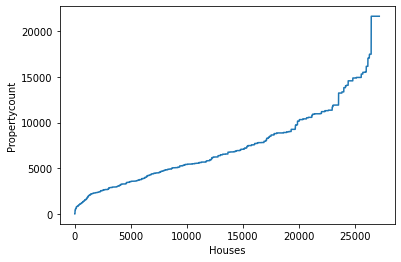

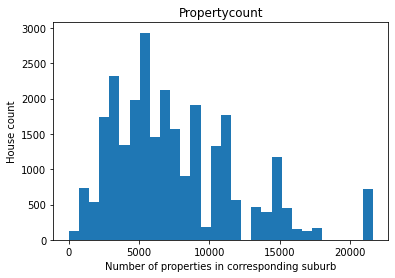

count    27165.000000
mean      7566.334033
std       4490.938758
min          2.000000
25%       4294.000000
50%       6567.000000
75%      10412.000000
max      21650.000000
Name: Propertycount, dtype: float64

There are 0 properties with a value of 0 for Propertycount


In [22]:
most_common_no_of_pcount = df['Car'].mode()[0]
check_float_column(df, "Propertycount", "Number of properties in corresponding suburb", nan_replacement=most_common_no_of_pcount)

# Checking text values

Found 341 values for column Suburb


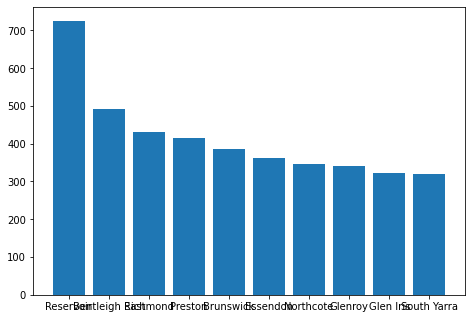

In [23]:
check_text_column(df, 'Suburb', plot_first_ten=True)

Found 26670 values for column Address


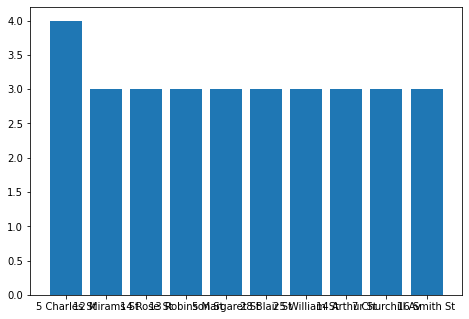

In [24]:
check_text_column(df, 'Address', plot_first_ten=True)

Found 3 values for column Type


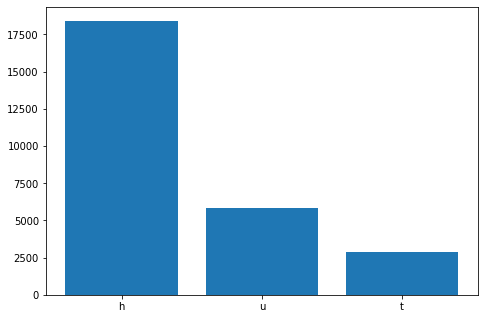

In [25]:
check_text_column(df, 'Type')

Found 5 values for column Method


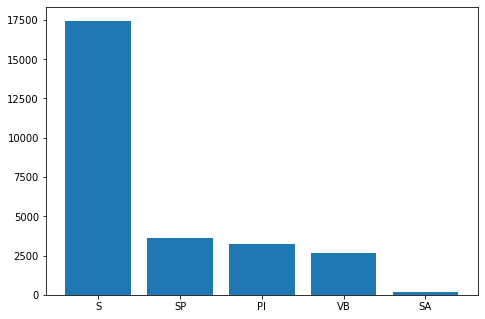

In [26]:
check_text_column(df, 'Method')

Found 349 values for column SellerG


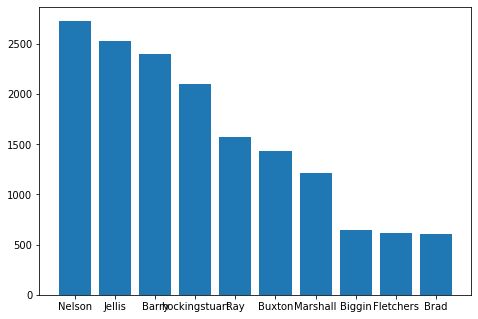

In [27]:
check_text_column(df, 'SellerG', plot_first_ten=True)
# Nelson is out there pushing P

Found 34 values for column CouncilArea


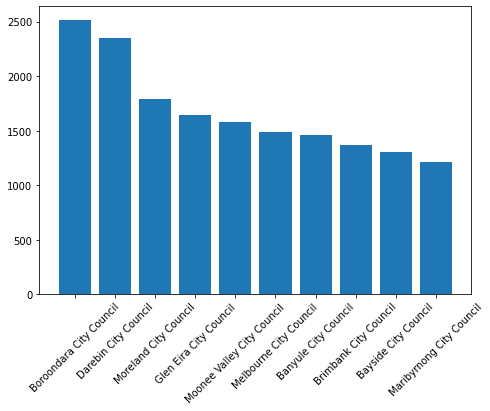

In [28]:
check_text_column(df, 'CouncilArea', plot_first_ten=True, rotate_labels=True)

Found 9 values for column Regionname


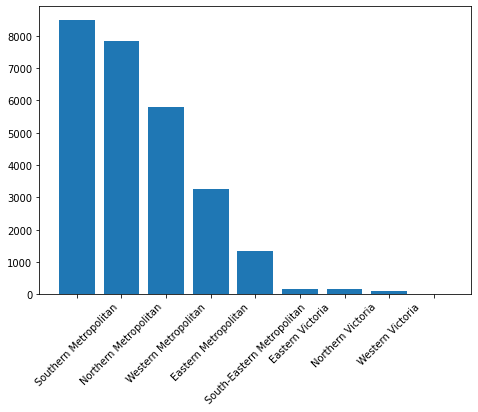

In [29]:
check_text_column(df, 'Regionname', plot_first_ten=True, rotate_labels=True)

In [30]:
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
YearBuilt           0
CouncilArea         0
Lattitude        6254
Longtitude       6254
Regionname          0
Propertycount       0
dtype: int64

Final results:
Usefull:
* Suburb              
* Rooms
* Type
* Distance => Postcode => Lat+Long
* Bedroom2
* Bathroom
* Car
* Landsize
* BuildingArea
* YearBuilt
* CouncilArea
* Regionname

Maybe:
* Method
* SellerG
* Date

Useless:
* Address

In [32]:
# exporting cleaned dataset for future use
df.to_csv('cleaned_data.csv')